In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1a-sTBUhBEP-nIcLlxDJWGs0nmfAjS3Dl'})
fileDownloaded2 = drive.CreateFile({'id':'1MeEWzUMXOv_be1W0XLf-pqhM_tHAvNuH'})
fileDownloaded.GetContentFile('pulsars_test_set')
fileDownloaded2.GetContentFile('pulsars_train_set')

In [ ]:
df1 = pd.read_csv('pulsars_test_set')
df1.tail(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12633,106.875000,47.571328,0.199440,0.284964,3.079431,20.984455,8.427475,78.259366,0
12634,133.820312,43.478161,0.136691,0.353121,0.982441,9.486068,18.528395,444.411748,0
12635,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
12636,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
12637,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
12638,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
12639,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
12640,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
12641,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
12642,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [ ]:
df2 = pd.read_csv('pulsars_train_set')
df2.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
5250,89.453125,35.848827,0.731656,3.101474,1.450669,14.204964,11.203558,142.473878,0
5251,127.070312,47.663564,0.006552,-0.123634,0.853679,11.197206,16.122702,296.507738,0
5252,121.375000,53.245158,0.103772,-0.365119,1.095318,12.239976,16.258042,303.880023,0
5253,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
5254,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
df1.dtypes

Mean of the integrated profile                   float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

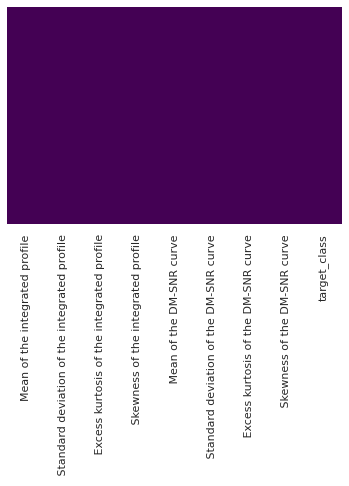

In [ ]:
import seaborn as sns; sns.set_theme()
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

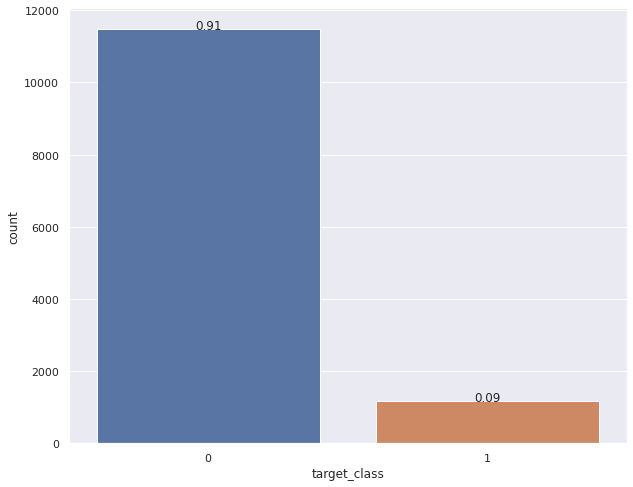

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
total = float(len(df1))
ax = sns.countplot(x = 'target_class', data = df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 

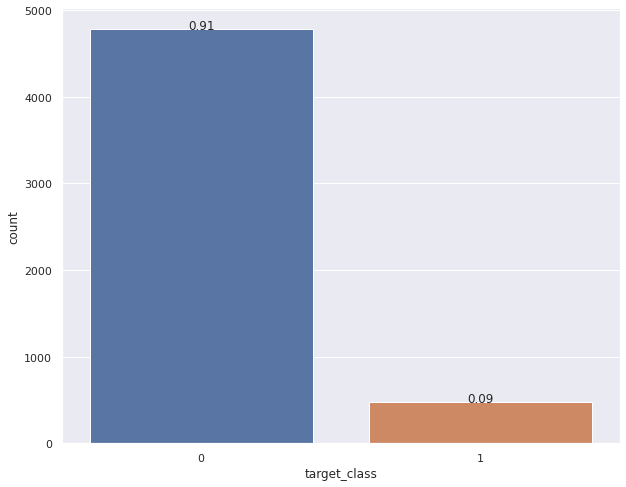

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
total = float(len(df2))
ax = sns.countplot(x = 'target_class', data = df2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


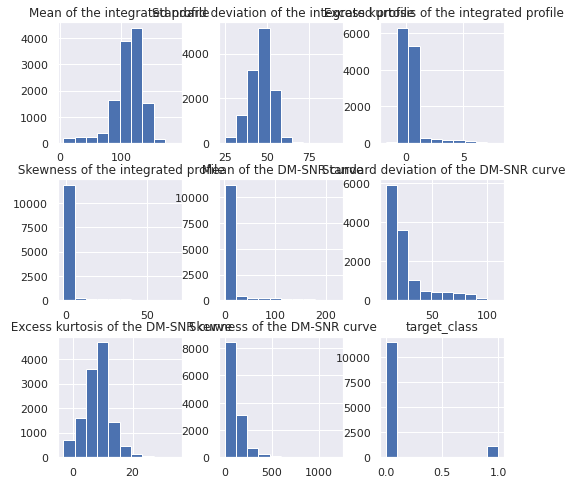

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df1.hist(ax=ax)
plt.show()

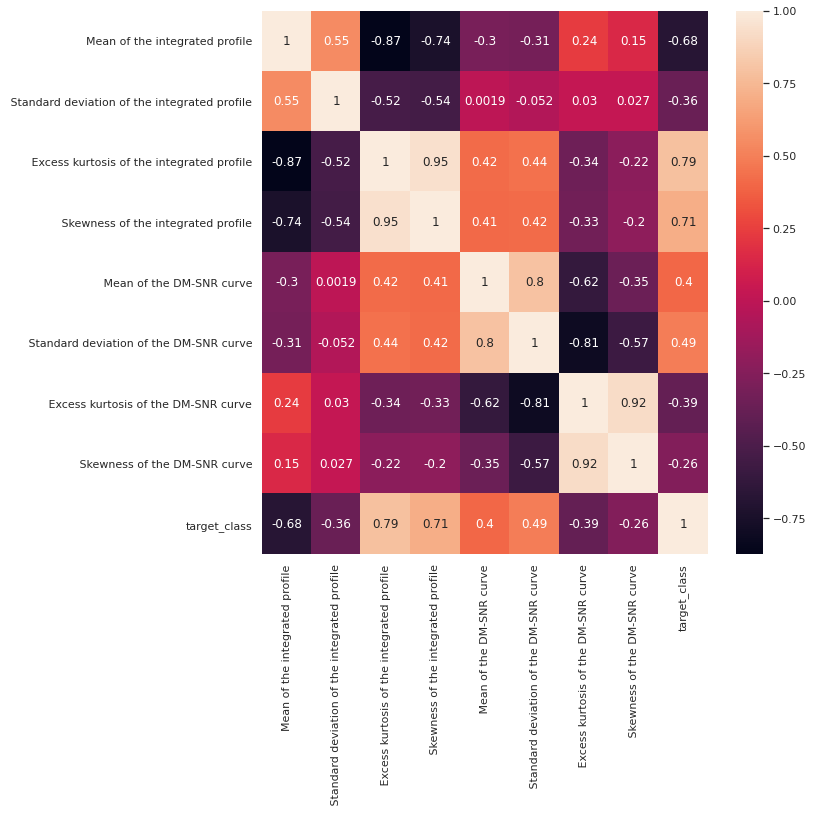

In [ ]:
plt.figure(figsize = (10, 10))
corr_mat = df1.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)